In [61]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import quandl
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import math
from scipy.stats import t
import seaborn as sns


import warnings 
warnings.filterwarnings("ignore")


In [2]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'STRL', 'SU' , 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2)]

#Download historical stock prices
start_date = '2023-01-01'
end_date = '2023-04-14'
Equity_df = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  15 of 15 completed


In [3]:
# Calculating the daily log return
Equity_df_log_return = np.log1p(Equity_df.pct_change())
Equity_df_log_return

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF
Date,,,,,,,,,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.010261,0.031036,0.018626,0.029645,-0.011738,0.009282,0.073285,0.026145,-0.022291,-0.005320,-0.002694,-0.012994,0.006714,0.008836,0.015899
2023-01-05,-0.010661,-0.000209,-0.002052,-0.003053,-0.021575,-0.000222,0.009366,-0.032790,-0.009420,-0.020521,-0.053884,0.015638,-0.014471,-0.011782,-0.007484
2023-01-06,0.036133,0.025237,0.009930,0.020676,0.013138,0.018955,0.036962,0.032790,0.025056,0.008134,0.011637,0.035034,0.014275,0.021830,0.022004
2023-01-09,0.004081,-0.003362,-0.015227,0.007459,0.007756,-0.004141,-0.007248,0.037979,-0.050963,0.007657,0.006545,0.005087,0.002948,0.000412,-0.003681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,0.005481,-0.014264,0.007210,0.004070,0.037113,-0.001098,0.028669,-0.024293,-0.001204,0.019681,-0.009482,-0.012262,0.004864,0.003303,0.003758
2023-04-10,-0.016101,0.012732,0.003586,0.001015,-0.018431,0.003289,0.077359,0.071176,0.005527,-0.016950,0.013762,0.007564,0.000000,0.002261,0.002186
2023-04-11,-0.007620,0.006020,0.027186,0.006068,-0.010293,0.004914,0.004730,0.059277,0.001437,0.004174,0.007659,0.014339,-0.004864,0.001031,0.008696


In [4]:
# Calculating the mean of all returna

mean_log_return = Equity_df_log_return.mean(axis=0)
mean_log_return

AAPL     0.004087
APTV     0.001909
BAC     -0.002223
EEM      0.000634
GOOGL    0.002708
JPM     -0.000453
MU       0.003272
MVST    -0.001731
PFE     -0.002939
SNY      0.001961
STRL     0.001093
SU       0.001288
UL       0.001139
VTI      0.001174
XLF     -0.000691
dtype: float64

In [5]:
#Options Data for Leverage Factor :
Options_data = pd.DataFrame({
    'Date': ['2023-04-13', '2023-04-14'],
    'GOOGL Close': [0.67, 1.03],
    'MU Close': [0.52, 0.31],
    'AAPL Close':[0.02 , 0.01]
})
# set the Date column as the index
Options_data.set_index('Date', inplace=True)

#Stocks Data to calculate Leverage Factor :
#Underlying Data for Leverage Factor :
Underlying_data = pd.DataFrame({
    'Date': ['2023-04-13', '2023-04-14'],
    'GOOGL Close': [107.43, 108.87],
    'MU Close': [63, 62.63],
    'AAPL Close':[165.56 , 165.21]
})
# set the Date column as the index
Underlying_data.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta = Options_data.diff().iloc[1] / Underlying_data.diff().iloc[1]
leverage_factor= (delta * Underlying_data.iloc[0]) / Options_data.iloc[0]
print(leverage_factor)

GOOGL Close     40.085821
MU Close        68.762994
AAPL Close     236.514286
dtype: float64


In [6]:
mean_log_return_options = pd.Series()
mean_log_return_options['GOOGL_O'] = mean_log_return['GOOGL']
mean_log_return_options['MU_O'] = mean_log_return['MU']
mean_log_return_options['AAPL_O'] = mean_log_return['AAPL']
print(mean_log_return_options)

GOOGL_O    0.002708
MU_O       0.003272
AAPL_O     0.004087
dtype: float64


In [7]:
# Downloading the bonds data
bond_1 = pd.read_csv('Bond1.csv')
bond_2 = pd.read_csv('Bond2.csv')

In [8]:
# Rearranging the data according the dates

bond_1.sort_values(by = 'Date', inplace=True)
bond_2.sort_values(by = 'Date', inplace=True)

In [9]:
# Joining the 2 bonds data into 1

bond_data = pd.DataFrame()
bond_data['Date'] = Equity_df.index
bond_data['Bond1'] = bond_1['Close']
bond_data['Bond2'] = bond_2['Close']

bond_data.set_index('Date', inplace=True)
bond_data.tail()

,Bond1,Bond2
Date,,
2023-04-06,96.44372,95.56055
2023-04-10,96.45293,95.56445
2023-04-11,96.45716,95.49000
2023-04-12,96.48045,96.02734
2023-04-13,96.52075,96.27930


In [10]:
# Calculate the yield of the bonds / Risk Factor

t = 0.1923
T = 1

bond_yield = (-1 / (T-t)) * np.log(bond_data)
bond_yield.head()

,Bond1,Bond2
Date,,
2023-01-03,-5.660842,-5.674099
2023-01-04,-5.661017,-5.674380
2023-01-05,-5.660564,-5.672198
2023-01-06,-5.660870,-5.673821
2023-01-09,-5.660873,-5.672306


In [11]:
#Risk Factor Changes:
risk_factor_bond = bond_yield.diff()
risk_factor_bond

,Bond1,Bond2
Date,,
2023-01-03,NaN,NaN
2023-01-04,-0.000175,-0.000281
2023-01-05,0.000452,0.002182
2023-01-06,-0.000306,-0.001624
2023-01-09,-0.000003,0.001515
...,...,...
2023-04-06,-0.000584,-0.001165
2023-04-10,-0.000118,-0.000051
2023-04-11,-0.000054,0.000965


In [12]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds = risk_factor_bond.mean(axis=0)
mean_risk_factor_bonds

Bond1    0.000045
Bond2    0.000282
dtype: float64

In [13]:
# Grouping all the investments together/risk_factor_changes

risk_factor_changes = Equity_df_log_return.copy()
risk_factor_changes['GOOGL_O'] = Equity_df_log_return['GOOGL']
risk_factor_changes['MU_O'] = Equity_df_log_return['MU']
risk_factor_changes['AAPL_O'] = Equity_df_log_return['AAPL']
risk_factor_changes['Bond_1'] = risk_factor_bond['Bond1']
risk_factor_changes['Bond_2'] =  risk_factor_bond['Bond2']
risk_factor_changes = risk_factor_changes[1:]

risk_factor_changes

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,
2023-01-04,0.010261,0.031036,0.018626,0.029645,-0.011738,0.009282,0.073285,0.026145,-0.022291,-0.005320,-0.002694,-0.012994,0.006714,0.008836,0.015899,-0.011738,0.073285,0.010261,-0.000175,-0.000281
2023-01-05,-0.010661,-0.000209,-0.002052,-0.003053,-0.021575,-0.000222,0.009366,-0.032790,-0.009420,-0.020521,-0.053884,0.015638,-0.014471,-0.011782,-0.007484,-0.021575,0.009366,-0.010661,0.000452,0.002182
2023-01-06,0.036133,0.025237,0.009930,0.020676,0.013138,0.018955,0.036962,0.032790,0.025056,0.008134,0.011637,0.035034,0.014275,0.021830,0.022004,0.013138,0.036962,0.036133,-0.000306,-0.001624
2023-01-09,0.004081,-0.003362,-0.015227,0.007459,0.007756,-0.004141,-0.007248,0.037979,-0.050963,0.007657,0.006545,0.005087,0.002948,0.000412,-0.003681,0.007756,-0.007248,0.004081,-0.000003,0.001515
2023-01-10,0.004447,0.016800,0.006764,0.007158,0.004534,0.008914,0.014969,0.054394,-0.016040,0.006370,0.022425,-0.015663,0.001177,0.007851,0.005658,0.004534,0.014969,0.004447,0.000495,0.001980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,0.005481,-0.014264,0.007210,0.004070,0.037113,-0.001098,0.028669,-0.024293,-0.001204,0.019681,-0.009482,-0.012262,0.004864,0.003303,0.003758,0.037113,0.028669,0.005481,-0.000584,-0.001165
2023-04-10,-0.016101,0.012732,0.003586,0.001015,-0.018431,0.003289,0.077359,0.071176,0.005527,-0.016950,0.013762,0.007564,0.000000,0.002261,0.002186,-0.018431,0.077359,-0.016101,-0.000118,-0.000051
2023-04-11,-0.007620,0.006020,0.027186,0.006068,-0.010293,0.004914,0.004730,0.059277,0.001437,0.004174,0.007659,0.014339,-0.004864,0.001031,0.008696,-0.010293,0.004730,-0.007620,-0.000054,0.000965


In [14]:
# Calculate covariance matrix
covariance_matrix = risk_factor_changes.cov()

# Print covariance matrix
covariance_matrix

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,STRL,SU,UL,VTI,XLF,GOOGL_O,MU_O,AAPL_O,Bond_1,Bond_2
AAPL,2.094428e-04,1.352791e-04,0.000099,6.729561e-05,2.343372e-04,0.000087,1.639927e-04,0.000307,5.337156e-05,-0.000006,0.000097,3.850797e-05,2.411053e-05,1.184585e-04,0.000102,2.343372e-04,1.639927e-04,2.094428e-04,-4.931645e-08,5.741178e-06
APTV,1.352791e-04,4.237080e-04,0.000201,1.025423e-04,1.744759e-04,0.000174,2.668493e-04,0.000353,2.139144e-05,0.000020,0.000224,1.207418e-04,2.519764e-05,1.519864e-04,0.000173,1.744759e-04,2.668493e-04,1.352791e-04,7.195081e-07,-1.737682e-07
BAC,9.900528e-05,2.014643e-04,0.000347,6.274546e-05,1.101682e-04,0.000237,1.725646e-04,0.000182,5.896995e-05,0.000005,0.000196,1.408825e-04,2.223375e-05,1.275653e-04,0.000222,1.101682e-04,1.725646e-04,9.900528e-05,2.511463e-06,1.185438e-05
EEM,6.729561e-05,1.025423e-04,0.000063,1.074215e-04,7.964619e-05,0.000062,1.510737e-04,0.000121,1.306854e-05,0.000039,0.000043,6.942656e-05,3.482496e-05,6.654097e-05,0.000067,7.964619e-05,1.510737e-04,6.729561e-05,-4.050910e-07,-1.974749e-06
GOOGL,2.343372e-04,1.744759e-04,0.000110,7.964619e-05,5.733946e-04,0.000067,2.285083e-04,0.000415,5.626974e-05,0.000012,0.000125,4.711129e-06,9.323970e-07,1.645290e-04,0.000112,5.733946e-04,2.285083e-04,2.343372e-04,1.038662e-06,1.684809e-05
JPM,8.722231e-05,1.737305e-04,0.000237,6.191984e-05,6.650561e-05,0.000267,1.201723e-04,0.000182,5.181422e-05,0.000027,0.000174,1.630518e-04,4.781661e-05,1.036226e-04,0.000183,6.650561e-05,1.201723e-04,8.722231e-05,2.184687e-06,8.947604e-06
MU,1.639927e-04,2.668493e-04,0.000173,1.510737e-04,2.285083e-04,0.000120,7.080994e-04,0.000253,3.055139e-05,0.000016,0.000098,9.286994e-05,8.619781e-06,1.471656e-04,0.000149,2.285083e-04,7.080994e-04,1.639927e-04,-7.307069e-07,-4.002636e-06
MVST,3.072593e-04,3.526696e-04,0.000182,1.214532e-04,4.146018e-04,0.000182,2.528285e-04,0.001706,1.206253e-04,-0.000070,0.000233,1.254695e-05,4.353743e-05,2.355809e-04,0.000192,4.146018e-04,2.528285e-04,3.072593e-04,4.551266e-06,3.624867e-05
PFE,5.337156e-05,2.139144e-05,0.000059,1.306854e-05,5.626974e-05,0.000052,3.055139e-05,0.000121,1.577642e-04,0.000018,0.000051,3.012400e-05,3.555943e-05,5.131453e-05,0.000050,5.626974e-05,3.055139e-05,5.337156e-05,9.167313e-07,3.721837e-06
SNY,-5.991668e-06,1.972232e-05,0.000005,3.948529e-05,1.245841e-05,0.000027,1.590268e-05,-0.000070,1.828593e-05,0.000170,0.000028,3.162592e-05,3.652075e-05,2.428210e-05,0.000030,1.245841e-05,1.590268e-05,-5.991668e-06,-1.248629e-06,-1.161561e-05


In [15]:
#Loss Distribution Of Equity :
# Stock quantities
stocks_qty = {'AAPL': 185.0, 'APTV': 239.0, 'BAC': 748.0, 'EEM': 637.0, 'GOOGL': 272.0, 'MU': 427.0, 'JPM': 189.0, 'MVST': 17096.0, 'PFE': 608.0, 'SNY': 542.0, 'STRL': 773.0, 'SU': 775.0, 'UL': 526.0, 'VTI': 131.0, 'XLF': 731.0}

# Stock prices
stock_prices = [165.559998, 106.040001, 28.559999, 39.930000, 107.430000, 128.990005, 63.000000, 1.34, 41.470001, 56.099998, 36.070000, 32.650002, 54.110001, 205.649994, 32.560001]

# Calculate the loss distribution for each stock
loss_distribution = {}
for stock, qty in stocks_qty.items():
    stock_price = stock_prices.pop(0)
    loss = qty * stock_price
    loss_distribution[stock] = loss

# Print the loss distribution for each stock
print("Loss Distribution for Each Stock:")
for stock, loss in loss_distribution.items():
    print(f"{stock}: {loss}")


Loss Distribution for Each Stock:
AAPL: 30628.59963
APTV: 25343.560239000002
BAC: 21362.879252000002
EEM: 25435.41
GOOGL: 29220.960000000003
MU: 55078.732135
JPM: 11907.0
MVST: 22908.640000000003
PFE: 25213.760608
SNY: 30406.198916
STRL: 27882.11
SU: 25303.75155
UL: 28461.860525999997
VTI: 26940.149213999997
XLF: 23801.360731


In [16]:
#Loss Distribution for Options :
# GOOGL :

# Price of underlying asset
Number_of_Options_GOOGL = 200
Price_of_Underlying_GOOGL = 1.03
# Loss factor for options
loss_factor_option_GOOGL = 40.085821

# Calculate the loss distribution for options
loss_distribution_options_GOOGL = Number_of_Options_GOOGL * Price_of_Underlying_GOOGL * loss_factor_option_GOOGL
print("Loss Distribution of GOOGL option :", loss_distribution_options_GOOGL)


# MU

# Price of underlying asset
Number_of_Options_MU = 400
Price_of_Underlying_MU = 0.31
# Loss factor for options
loss_factor_option_MU = 68.762994

# Calculate the loss distribution for options
loss_distribution_options_MU = Number_of_Options_MU * Price_of_Underlying_MU * loss_factor_option_MU
print("Loss Distribution of MU option :", loss_distribution_options_MU)

#AAPL

# Price of underlying asset
Number_of_Options_AAPL = 200
Price_of_Underlying_AAPL = 0.01
# Loss factor for options
loss_factor_option_AAPL = 236.514286

# Calculate the loss distribution for options
loss_distribution_options_AAPL = Number_of_Options_AAPL * Price_of_Underlying_AAPL * loss_factor_option_AAPL
print("Loss Distribution of APPL option :", loss_distribution_options_AAPL)

Loss Distribution of GOOGL option : 8257.679126
Loss Distribution of MU option : 8526.611256
Loss Distribution of APPL option : 473.028572


In [17]:
#Loss Distribution of Bonds :
#Bond1:
Num_Bond1 = 3084
Bond1_Price = 97.29100
Time_maturity_Bond1 = 0.6
Loss_Dis_Bond1 =  Num_Bond1*Bond1_Price*Time_maturity_Bond1
print("Loss Distribution of Bond1 :", Loss_Dis_Bond1)

#Bond1:
Num_Bond2 = 3332
Bond2_Price = 96.021532
Time_maturity_Bond2 = 0.6
Loss_Dis_Bond2 =  Num_Bond2*Bond2_Price*Time_maturity_Bond2
print("Loss Distribution of Bond2 :", Loss_Dis_Bond2)

Loss Distribution of Bond1 : 180027.2664
Loss Distribution of Bond2 : 191966.24677439997


In [18]:
#This is a C Vector:
## Create a list to store the loss distributions
portfolio_loss_distribution = []

# Append the loss distributions for stocks to the list
for stock, loss in loss_distribution.items():
    portfolio_loss_distribution.append(loss)

# Append the loss distributions for options to the list
portfolio_loss_distribution.append(loss_distribution_options_GOOGL)
portfolio_loss_distribution.append(loss_distribution_options_MU)
portfolio_loss_distribution.append(loss_distribution_options_AAPL)

# Append the loss distributions for bonds to the list
portfolio_loss_distribution.append(Loss_Dis_Bond1)
portfolio_loss_distribution.append(Loss_Dis_Bond2)

portfolio_loss_distribution

[30628.59963,
 25343.560239000002,
 21362.879252000002,
 25435.41,
 29220.960000000003,
 55078.732135,
 11907.0,
 22908.640000000003,
 25213.760608,
 30406.198916,
 27882.11,
 25303.75155,
 28461.860525999997,
 26940.149213999997,
 23801.360731,
 8257.679126,
 8526.611256,
 473.028572,
 180027.2664,
 191966.24677439997]

In [19]:
portfolio_loss_distribution

[30628.59963,
 25343.560239000002,
 21362.879252000002,
 25435.41,
 29220.960000000003,
 55078.732135,
 11907.0,
 22908.640000000003,
 25213.760608,
 30406.198916,
 27882.11,
 25303.75155,
 28461.860525999997,
 26940.149213999997,
 23801.360731,
 8257.679126,
 8526.611256,
 473.028572,
 180027.2664,
 191966.24677439997]

In [20]:
#To find the Portfolio's Mean :
mean_log_return

AAPL     0.004087
APTV     0.001909
BAC     -0.002223
EEM      0.000634
GOOGL    0.002708
JPM     -0.000453
MU       0.003272
MVST    -0.001731
PFE     -0.002939
SNY      0.001961
STRL     0.001093
SU       0.001288
UL       0.001139
VTI      0.001174
XLF     -0.000691
dtype: float64

In [21]:
#Mean of risk factor changes:
mean_risk_factor_investment = mean_log_return.append(mean_log_return_options)
mean_risk_factor_investment = mean_risk_factor_investment.append(mean_risk_factor_bonds)
print(mean_risk_factor_investment)

AAPL       0.004087
APTV       0.001909
BAC       -0.002223
EEM        0.000634
GOOGL      0.002708
JPM       -0.000453
MU         0.003272
MVST      -0.001731
PFE       -0.002939
SNY        0.001961
STRL       0.001093
SU         0.001288
UL         0.001139
VTI        0.001174
XLF       -0.000691
GOOGL_O    0.002708
MU_O       0.003272
AAPL_O     0.004087
Bond1      0.000045
Bond2      0.000282
dtype: float64


In [22]:
#Portfolio Mean:
portfolio_mean = np.dot(portfolio_loss_distribution, mean_risk_factor_investment)
portfolio_mean 

406.29220021184835

In [23]:
#Varriance of Portfolio:
portfolio_varriance = np.dot(portfolio_loss_distribution ,covariance_matrix)
portfolio_varriance = np.dot(portfolio_varriance.T , portfolio_loss_distribution )
portfolio_varriance

23820468.261196177

In [24]:
#Std deviation : 
Std_deviation = portfolio_varriance**0.5
Std_deviation

4880.621708470774

#### For normal distribution

In [25]:
import numpy as np
from scipy.stats import norm

# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
alpha2 = 0.03 # 97% confidence level
# Calculate volatility over the horizon
sig_h = Std_deviation 

# Calculate VaR for the portfolio for 0.95
VaR_n_1 = norm.ppf(1 - alpha1) * sig_h + portfolio_mean

# Calculate VaR for the portfolio for 0.97
VaR_n_2 = norm.ppf(1 - alpha2) * sig_h + portfolio_mean

print("95% VaR normal is", round(VaR_n_1, 2))
print("97% VaR normal is", round(VaR_n_2, 2))

95% VaR normal is 8434.2
97% VaR normal is 9585.73


In [26]:
# import numpy as np
from scipy.stats import norm

# Horizon and confidence levels
h = 120 # horizon of 120 days
alpha1 = 0.95 # 95% confidence level
alpha2 = 0.97 # 97% confidence level

# Calculate volatility over the horizon
sig_h = Std_deviation 

# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_n1 = (1 / (1 - alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h) + portfolio_mean

# Calculate Expected Shortfall (CVaR) for 97% confidence level
ES_n2 = (1 / (1 - alpha2)) * (norm.pdf(norm.ppf(alpha2)) * sig_h) + portfolio_mean

print("95% CVaR/ES normal is", round(ES_n1, 2))
print("97% CVaR/ES normal is", round(ES_n2, 2))

95% CVaR/ES normal is 10473.61
97% CVaR/ES normal is 11475.86


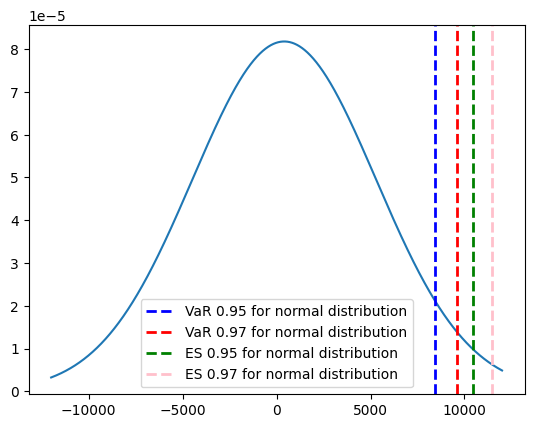

In [27]:
from scipy.stats import norm
x_axis  = np.arange(-12000,12000, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, portfolio_mean,Std_deviation))
plt.axvline(x=VaR_n_1, color='blue', linestyle='dashed', linewidth=2, label='VaR 0.95 for normal distribution' )
plt.axvline(x=VaR_n_2, color='red', linestyle='dashed', linewidth=2, label='VaR 0.97 for normal distribution' )
plt.axvline(x=ES_n1, color='green', linestyle='dashed', linewidth=2, label='ES 0.95 for normal distribution' )
plt.axvline(x=ES_n2, color='pink', linestyle='dashed', linewidth=2, label='ES 0.97 for normal distribution' )
plt.legend()
plt.show()

#### For t-distribution

In [28]:
# Horizon and confidence levels
import math
from scipy.stats import t

# Input variables
mean =  portfolio_mean  # Portfolio mean
std_dev = Std_deviation # Portfolio standard deviation
conf_level_1 = 0.95   # 95% confidence level
conf_level_2 = 0.97
sample_size = 20   # Portfolio sample size

# Calculate t-statistic
df = sample_size - 1 if sample_size < 30 else math.inf
t_stat_1 = t.ppf(conf_level_1, df)
t_stat_2 = t.ppf(conf_level_2, df)

# Calculate VaR
var_t_1 = (t_stat_1 * std_dev) + mean

var_t_2 = (t_stat_2 * std_dev) + mean

print("95% VaR t-distribution is", round(var_t_1, 2))
print("97% VaR t-distribution is", round(var_t_2, 2))


95% VaR t-distribution is 8845.54
97% VaR t-distribution is 10167.62


In [29]:
# Horizon and confidence levels
import math
from scipy.stats import t
 
# Horizon and confidence levels
h = 120 # horizon of 120 days
alpha1 = 0.95 # 95% confidence level
alpha2 = 0.97 # 97% confidence level
portfolio_size = 20
# Calculate degrees of freedom for t-distribution
n = portfolio_size - 1

# Calculate volatility over the horizon
sig_h_t = Std_deviation 

# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_t_1 = ((t.pdf(t.ppf(alpha1, n), n) / (1 - alpha1)) * sig_h_t) + portfolio_mean

# Calculate Expected Shortfall (CVaR) for 97% confidence level
ES_t_2 =  ((t.pdf(t.ppf(alpha2, n), n) / (1 - alpha2)) * sig_h_t) + portfolio_mean 

print("95% CVaR/ES t-distribution is", round(ES_t_1, 2))
print("97% CVaR/ES t-distribution is", round(ES_t_2, 2))  

95% CVaR/ES t-distribution is 9318.94
97% CVaR/ES t-distribution is 9886.04


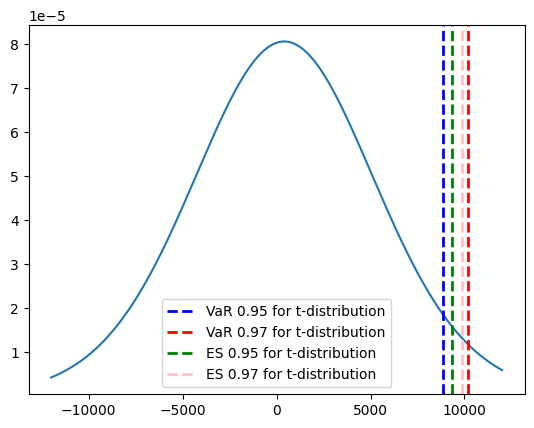

In [30]:
from scipy.stats import t
x_axis = np.arange(-12000, 12000, 0.01)
plt.plot(x_axis, t.pdf(x_axis, sample_size-1, portfolio_mean, Std_deviation))
plt.axvline(x=var_t_1, color='blue', linestyle='dashed', linewidth=2, label='VaR 0.95 for t-distribution')
plt.axvline(x=var_t_2, color='red', linestyle='dashed', linewidth=2, label='VaR 0.97 for t-distribution')
plt.axvline(x=ES_t_1, color='green', linestyle='dashed', linewidth=2, label='ES 0.95 for t-distribution')
plt.axvline(x=ES_t_2, color='pink', linestyle='dashed', linewidth=2, label='ES 0.97 for t-distribution')
plt.legend()
plt.show()

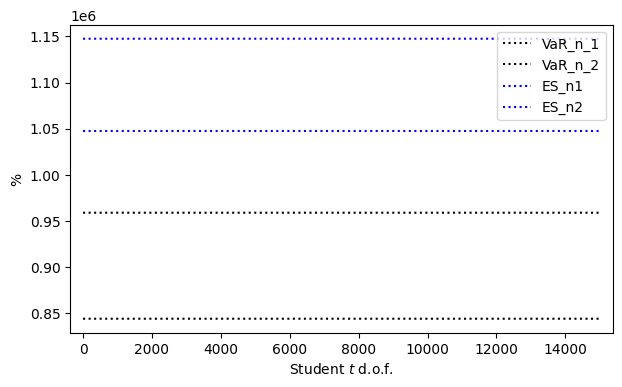

In [31]:
# Plot VaR and CVaR for the normal and t-distributions
fig, ax = plt.subplots(figsize=(7,4))
plt.plot(np.arange(0,15000), VaR_n_1*np.ones(15000)*100, ":k", label="VaR_n_1")
plt.plot(np.arange(0,15000), VaR_n_2*np.ones(15000)*100, ":k", label="VaR_n_2")
plt.plot(np.arange(0,15000), ES_n1*np.ones(15000)*100, ":b", label="ES_n1")
plt.plot(np.arange(0,15000), ES_n2*np.ones(15000)*100, ":b",label="ES_n2" )
plt.xlabel("Student $t$ d.o.f.")
plt.ylabel("%")
plt.legend(loc=1)
ax.margins(x=0.025, y=0.05) # add extra padding
plt.show()

## 20% Risk Reduction 

In [32]:
# Define portfolio assets and options
equities_etfs = ['AAPL', 'APTV', 'BAC', 'EEM', 'GOOGL', 'MU', 'JPM', 'MVST', 'PFE', 'SNY', 'SQQQ', 'STRL', 'SU' ,'TECS', 'UL' , 'VTI' , 'XLF']
options_shorted = [('GOOGL', '2023-04-21', 'C', -2), ('MU', '2023-04-21', 'C', -4), ('AAPL', '2023-04-21', 'P', 2) , ('BAC', '2023-04-21', 'P', -7)]

#Download historical stock prices
start_date = '2023-01-01'
end_date = '2023-04-14'
Equity_df_op = yf.download(equities_etfs, start=start_date, end=end_date)['Adj Close']
portfolio_returns = pd.DataFrame()

[*********************100%***********************]  17 of 17 completed


In [33]:
# Calculating the daily log return
Equity_df_log_return_op = np.log1p(Equity_df_op.pct_change())
Equity_df_log_return_op

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,SQQQ,STRL,SU,TECS,UL,VTI,XLF
Date,,,,,,,,,,,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.010261,0.031036,0.018626,0.029645,-0.011738,0.009282,0.073285,0.026145,-0.022291,-0.005320,-0.013509,-0.002694,-0.012994,-0.005520,0.006714,0.008836,0.015899
2023-01-05,-0.010661,-0.000209,-0.002052,-0.003053,-0.021575,-0.000222,0.009366,-0.032790,-0.009420,-0.020521,0.045275,-0.053884,0.015638,0.057065,-0.014471,-0.011782,-0.007484
2023-01-06,0.036133,0.025237,0.009930,0.020676,0.013138,0.018955,0.036962,0.032790,0.025056,0.008134,-0.082916,0.011637,0.035034,-0.090593,0.014275,0.021830,0.022004
2023-01-09,0.004081,-0.003362,-0.015227,0.007459,0.007756,-0.004141,-0.007248,0.037979,-0.050963,0.007657,-0.021606,0.006545,0.005087,-0.034949,0.002948,0.000412,-0.003681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,0.005481,-0.014264,0.007210,0.004070,0.037113,-0.001098,0.028669,-0.024293,-0.001204,0.019681,-0.020640,-0.009482,-0.012262,-0.015930,0.004864,0.003303,0.003758
2023-04-10,-0.016101,0.012732,0.003586,0.001015,-0.018431,0.003289,0.077359,0.071176,0.005527,-0.016950,0.002645,0.013762,0.007564,0.002673,0.000000,0.002261,0.002186
2023-04-11,-0.007620,0.006020,0.027186,0.006068,-0.010293,0.004914,0.004730,0.059277,0.001437,0.004174,0.019291,0.007659,0.014339,0.027207,-0.004864,0.001031,0.008696


In [34]:
# Calculating the mean of all returna

mean_log_return_op = Equity_df_log_return_op.mean(axis=0)
mean_log_return_op

AAPL     0.004087
APTV     0.001909
BAC     -0.002223
EEM      0.000634
GOOGL    0.002708
JPM     -0.000453
MU       0.003272
MVST    -0.001731
PFE     -0.002939
SNY      0.001961
SQQQ    -0.008782
STRL     0.001093
SU       0.001288
TECS    -0.008989
UL       0.001139
VTI      0.001174
XLF     -0.000691
dtype: float64

In [35]:
#Options Data for Leverage Factor :
Options_data_op = pd.DataFrame({
    'Date': ['2023-04-13', '2023-04-14'],
    'GOOGL Close': [0.67, 1.03],
    'MU Close': [0.52, 0.31],
    'BAC Close':[1.17, 1.02 ],
    'AAPL Close':[0.02 , 0.01]
})
# set the Date column as the index
Options_data_op.set_index('Date', inplace=True)

#Stocks Data to calculate Leverage Factor :
#Underlying Data for Leverage Factor :
Underlying_data_op = pd.DataFrame({
    'Date': ['2023-04-13', '2023-04-14'],
    'GOOGL Close': [107.43, 108.87],
    'MU Close': [63, 62.63],
    'BAC Close':[28.48, 28.559999],
    'AAPL Close':[165.56 , 165.21]
})
# set the Date column as the index
Underlying_data_op.set_index('Date', inplace=True)

# Calculate the Leverage Factor

delta_op = Options_data_op.diff().iloc[1] / Underlying_data_op.diff().iloc[1]
leverage_factor_op= (delta * Underlying_data_op.iloc[0]) / Options_data_op.iloc[0]
print(leverage_factor_op)

AAPL Close     236.514286
BAC Close             NaN
GOOGL Close     40.085821
MU Close        68.762994
dtype: float64


In [36]:
mean_log_return_options_op = pd.Series()
mean_log_return_options_op['GOOGL_O'] = mean_log_return_op['GOOGL']
mean_log_return_options_op['MU_O'] = mean_log_return_op['MU']
mean_log_return_options_op['BAC_O'] = mean_log_return_op['BAC']
mean_log_return_options_op['AAPL_O'] = mean_log_return_op['AAPL']
print(mean_log_return_options_op)

GOOGL_O    0.002708
MU_O       0.003272
BAC_O     -0.002223
AAPL_O     0.004087
dtype: float64


In [37]:
# Downloading the bonds data
bond_1 = pd.read_csv('Bond1.csv')
bond_2 = pd.read_csv('Bond2.csv')

In [38]:
# Rearranging the data according the dates

bond_1.sort_values(by = 'Date', inplace=True)
bond_2.sort_values(by = 'Date', inplace=True)

In [39]:
# Joining the 2 bonds data into 1

bond_data_op = pd.DataFrame()
bond_data_op['Date'] = Equity_df.index
bond_data_op['Bond1'] = bond_1['Close']
bond_data_op['Bond2'] = bond_2['Close']

bond_data_op.set_index('Date', inplace=True)
bond_data_op.tail()

,Bond1,Bond2
Date,,
2023-04-06,96.44372,95.56055
2023-04-10,96.45293,95.56445
2023-04-11,96.45716,95.49000
2023-04-12,96.48045,96.02734
2023-04-13,96.52075,96.27930


In [40]:
# Calculate the yield of the bonds / Risk Factor

t = 0.1923
T = 1

bond_yield_op = (-1 / (T-t)) * np.log(bond_data_op)
bond_yield_op.head()

,Bond1,Bond2
Date,,
2023-01-03,-5.660842,-5.674099
2023-01-04,-5.661017,-5.674380
2023-01-05,-5.660564,-5.672198
2023-01-06,-5.660870,-5.673821
2023-01-09,-5.660873,-5.672306


In [41]:
#Risk Factor Changes:
risk_factor_bond_op = bond_yield_op.diff()
risk_factor_bond_op

,Bond1,Bond2
Date,,
2023-01-03,NaN,NaN
2023-01-04,-0.000175,-0.000281
2023-01-05,0.000452,0.002182
2023-01-06,-0.000306,-0.001624
2023-01-09,-0.000003,0.001515
...,...,...
2023-04-06,-0.000584,-0.001165
2023-04-10,-0.000118,-0.000051
2023-04-11,-0.000054,0.000965


In [42]:
#Mean for Risk Factor bond changes:
mean_risk_factor_bonds_op = risk_factor_bond_op.mean(axis=0)
mean_risk_factor_bonds_op

Bond1    0.000045
Bond2    0.000282
dtype: float64

In [43]:
# Grouping all the investments together/risk_factor_changes

risk_factor_changes_op = Equity_df_log_return_op.copy()
risk_factor_changes_op['GOOGL_O'] = Equity_df_log_return_op['GOOGL']
risk_factor_changes_op['MU_O'] = Equity_df_log_return_op['MU']
risk_factor_changes_op['BAC_O'] = Equity_df_log_return_op['BAC']
risk_factor_changes_op['AAPL_O'] = Equity_df_log_return_op['AAPL']
risk_factor_changes_op['Bond_1'] = risk_factor_bond_op['Bond1']
risk_factor_changes_op['Bond_2'] =  risk_factor_bond_op['Bond2']
risk_factor_changes_op = risk_factor_changes_op[1:]

risk_factor_changes_op

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,...,TECS,UL,VTI,XLF,GOOGL_O,MU_O,BAC_O,AAPL_O,Bond_1,Bond_2
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-04,0.010261,0.031036,0.018626,0.029645,-0.011738,0.009282,0.073285,0.026145,-0.022291,-0.005320,...,-0.005520,0.006714,0.008836,0.015899,-0.011738,0.073285,0.018626,0.010261,-0.000175,-0.000281
2023-01-05,-0.010661,-0.000209,-0.002052,-0.003053,-0.021575,-0.000222,0.009366,-0.032790,-0.009420,-0.020521,...,0.057065,-0.014471,-0.011782,-0.007484,-0.021575,0.009366,-0.002052,-0.010661,0.000452,0.002182
2023-01-06,0.036133,0.025237,0.009930,0.020676,0.013138,0.018955,0.036962,0.032790,0.025056,0.008134,...,-0.090593,0.014275,0.021830,0.022004,0.013138,0.036962,0.009930,0.036133,-0.000306,-0.001624
2023-01-09,0.004081,-0.003362,-0.015227,0.007459,0.007756,-0.004141,-0.007248,0.037979,-0.050963,0.007657,...,-0.034949,0.002948,0.000412,-0.003681,0.007756,-0.007248,-0.015227,0.004081,-0.000003,0.001515
2023-01-10,0.004447,0.016800,0.006764,0.007158,0.004534,0.008914,0.014969,0.054394,-0.016040,0.006370,...,-0.018468,0.001177,0.007851,0.005658,0.004534,0.014969,0.006764,0.004447,0.000495,0.001980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-06,0.005481,-0.014264,0.007210,0.004070,0.037113,-0.001098,0.028669,-0.024293,-0.001204,0.019681,...,-0.015930,0.004864,0.003303,0.003758,0.037113,0.028669,0.007210,0.005481,-0.000584,-0.001165
2023-04-10,-0.016101,0.012732,0.003586,0.001015,-0.018431,0.003289,0.077359,0.071176,0.005527,-0.016950,...,0.002673,0.000000,0.002261,0.002186,-0.018431,0.077359,0.003586,-0.016101,-0.000118,-0.000051
2023-04-11,-0.007620,0.006020,0.027186,0.006068,-0.010293,0.004914,0.004730,0.059277,0.001437,0.004174,...,0.027207,-0.004864,0.001031,0.008696,-0.010293,0.004730,0.027186,-0.007620,-0.000054,0.000965


In [44]:
# Calculate covariance matrix
covariance_matrix_op = risk_factor_changes_op.cov()

# Print covariance matrix
covariance_matrix_op

,AAPL,APTV,BAC,EEM,GOOGL,JPM,MU,MVST,PFE,SNY,...,TECS,UL,VTI,XLF,GOOGL_O,MU_O,BAC_O,AAPL_O,Bond_1,Bond_2
AAPL,2.094428e-04,1.352791e-04,0.000099,6.729561e-05,2.343372e-04,0.000087,1.639927e-04,0.000307,5.337156e-05,-0.000006,...,-0.000503,2.411053e-05,1.184585e-04,0.000102,2.343372e-04,1.639927e-04,0.000099,2.094428e-04,-4.931645e-08,5.741178e-06
APTV,1.352791e-04,4.237080e-04,0.000201,1.025423e-04,1.744759e-04,0.000174,2.668493e-04,0.000353,2.139144e-05,0.000020,...,-0.000502,2.519764e-05,1.519864e-04,0.000173,1.744759e-04,2.668493e-04,0.000201,1.352791e-04,7.195081e-07,-1.737682e-07
BAC,9.900528e-05,2.014643e-04,0.000347,6.274546e-05,1.101682e-04,0.000237,1.725646e-04,0.000182,5.896995e-05,0.000005,...,-0.000291,2.223375e-05,1.275653e-04,0.000222,1.101682e-04,1.725646e-04,0.000347,9.900528e-05,2.511463e-06,1.185438e-05
EEM,6.729561e-05,1.025423e-04,0.000063,1.074215e-04,7.964619e-05,0.000062,1.510737e-04,0.000121,1.306854e-05,0.000039,...,-0.000242,3.482496e-05,6.654097e-05,0.000067,7.964619e-05,1.510737e-04,0.000063,6.729561e-05,-4.050910e-07,-1.974749e-06
GOOGL,2.343372e-04,1.744759e-04,0.000110,7.964619e-05,5.733946e-04,0.000067,2.285083e-04,0.000415,5.626974e-05,0.000012,...,-0.000719,9.323970e-07,1.645290e-04,0.000112,5.733946e-04,2.285083e-04,0.000110,2.343372e-04,1.038662e-06,1.684809e-05
JPM,8.722229e-05,1.737305e-04,0.000237,6.191979e-05,6.650564e-05,0.000267,1.201722e-04,0.000182,5.181425e-05,0.000027,...,-0.000242,4.781660e-05,1.036225e-04,0.000183,6.650564e-05,1.201722e-04,0.000237,8.722229e-05,2.184688e-06,8.947605e-06
MU,1.639927e-04,2.668493e-04,0.000173,1.510737e-04,2.285083e-04,0.000120,7.080994e-04,0.000253,3.055139e-05,0.000016,...,-0.000627,8.619781e-06,1.471656e-04,0.000149,2.285083e-04,7.080994e-04,0.000173,1.639927e-04,-7.307069e-07,-4.002636e-06
MVST,3.072593e-04,3.526696e-04,0.000182,1.214532e-04,4.146018e-04,0.000182,2.528285e-04,0.001706,1.206253e-04,-0.000070,...,-0.000874,4.353743e-05,2.355809e-04,0.000192,4.146018e-04,2.528285e-04,0.000182,3.072593e-04,4.551266e-06,3.624867e-05
PFE,5.337156e-05,2.139144e-05,0.000059,1.306854e-05,5.626974e-05,0.000052,3.055139e-05,0.000121,1.577642e-04,0.000018,...,-0.000143,3.555943e-05,5.131453e-05,0.000050,5.626974e-05,3.055139e-05,0.000059,5.337156e-05,9.167313e-07,3.721837e-06
SNY,-5.991668e-06,1.972232e-05,0.000005,3.948529e-05,1.245841e-05,0.000027,1.590268e-05,-0.000070,1.828593e-05,0.000170,...,-0.000087,3.652075e-05,2.428210e-05,0.000030,1.245841e-05,1.590268e-05,0.000005,-5.991668e-06,-1.248629e-06,-1.161561e-05


In [45]:
#Loss Distribution Of Equity :
# Stock quantities
stocks_qty_op = {'AAPL': 185.0, 'APTV': 239.0, 'BAC': 748.0, 'EEM': 637.0, 'GOOGL': 272.0, 'MU': 427.0, 'JPM': 189.0, 'MVST': 17096.0, 'PFE': 608.0, 'SNY': 542.0, 'SQQQ':500, 'STRL': 773.0, 'SU': 775.0,'TECS':700, 'UL': 526.0, 'VTI': 131.0, 'XLF': 731.0}

# Stock prices
stock_prices_op = [165.559998, 106.040001, 28.559999, 39.930000, 107.430000, 128.990005, 63.000000, 1.34, 41.470001, 56.099998, 32.69, 36.070000, 32.650002, 24.94, 54.110001, 205.649994, 32.560001]

# Calculate the loss distribution for each stock
loss_distribution = {}
for stock, qty in stocks_qty_op.items():
    stock_price = stock_prices_op.pop(0)
    loss = qty * stock_price
    loss_distribution[stock] = loss

# Print the loss distribution for each stock
print("Loss Distribution for Each Stock:")
for stock, loss in loss_distribution.items():
    print(f"{stock}: {loss}")


Loss Distribution for Each Stock:
AAPL: 30628.59963
APTV: 25343.560239000002
BAC: 21362.879252000002
EEM: 25435.41
GOOGL: 29220.960000000003
MU: 55078.732135
JPM: 11907.0
MVST: 22908.640000000003
PFE: 25213.760608
SNY: 30406.198916
SQQQ: 16344.999999999998
STRL: 27882.11
SU: 25303.75155
TECS: 17458.0
UL: 28461.860525999997
VTI: 26940.149213999997
XLF: 23801.360731


In [46]:
#Loss Distribution for Options :
# GOOGL :

# Price of underlying asset
Number_of_Options_GOOGL = 200
Price_of_Underlying_GOOGL = 1.03
# Loss factor for options
loss_factor_option_GOOGL = 40.085821

# Calculate the loss distribution for options
loss_distribution_options_GOOGL = Number_of_Options_GOOGL * Price_of_Underlying_GOOGL * loss_factor_option_GOOGL
print("Loss Distribution of GOOGL option :", loss_distribution_options_GOOGL)


# MU

# Price of underlying asset
Number_of_Options_MU = 400
Price_of_Underlying_MU = 0.31
# Loss factor for options
loss_factor_option_MU = 68.762994

# Calculate the loss distribution for options
loss_distribution_options_MU = Number_of_Options_MU * Price_of_Underlying_MU * loss_factor_option_MU
print("Loss Distribution of MU option :", loss_distribution_options_MU)

#BAC

# Price of underlying asset
Number_of_Options_BAC = 700
Price_of_Underlying_BAC = 0.02
# Loss factor for options
loss_factor_option_BAC = -45.641596

# Calculate the loss distribution for options
loss_distribution_options_BAC = Number_of_Options_BAC * Price_of_Underlying_BAC * loss_factor_option_BAC
print("Loss Distribution of BAC option :", loss_distribution_options_BAC)


#AAPL

# Price of underlying asset
Number_of_Options_AAPL = 200
Price_of_Underlying_AAPL = 0.01
# Loss factor for options
loss_factor_option_AAPL = 236.514286
# Calculate the loss distribution for options
loss_distribution_options_AAPL = Number_of_Options_AAPL * Price_of_Underlying_AAPL * loss_factor_option_AAPL
print("Loss Distribution of APPL option :", loss_distribution_options_AAPL)

Loss Distribution of GOOGL option : 8257.679126
Loss Distribution of MU option : 8526.611256
Loss Distribution of BAC option : -638.982344
Loss Distribution of APPL option : 473.028572


In [47]:
#Loss Distribution of Bonds :
#Bond1:
Num_Bond1 = 3084
Bond1_Price = 97.29100
Time_maturity_Bond1 = 0.6
Loss_Dis_Bond1 =  Num_Bond1*Bond1_Price*Time_maturity_Bond1
print("Loss Distribution of Bond1 :", Loss_Dis_Bond1)

#Bond1:
Num_Bond2 = 3332
Bond2_Price = 96.021532
Time_maturity_Bond2 = 0.6
Loss_Dis_Bond2 =  Num_Bond2*Bond2_Price*Time_maturity_Bond2
print("Loss Distribution of Bond2 :", Loss_Dis_Bond2)

Loss Distribution of Bond1 : 180027.2664
Loss Distribution of Bond2 : 191966.24677439997


In [48]:
#This is a C Vector:
## Create a list to store the loss distributions
portfolio_loss_distribution_op = []

# Append the loss distributions for stocks to the list
for stock, loss in loss_distribution.items():
    portfolio_loss_distribution_op.append(loss)

# Append the loss distributions for options to the list
portfolio_loss_distribution_op.append(loss_distribution_options_GOOGL)
portfolio_loss_distribution_op.append(loss_distribution_options_MU)
portfolio_loss_distribution_op.append(loss_distribution_options_BAC)
portfolio_loss_distribution_op.append(loss_distribution_options_AAPL)

# Append the loss distributions for bonds to the list
portfolio_loss_distribution_op.append(Loss_Dis_Bond1)
portfolio_loss_distribution_op.append(Loss_Dis_Bond2)

portfolio_loss_distribution_op

[30628.59963,
 25343.560239000002,
 21362.879252000002,
 25435.41,
 29220.960000000003,
 55078.732135,
 11907.0,
 22908.640000000003,
 25213.760608,
 30406.198916,
 16344.999999999998,
 27882.11,
 25303.75155,
 17458.0,
 28461.860525999997,
 26940.149213999997,
 23801.360731,
 8257.679126,
 8526.611256,
 -638.982344,
 473.028572,
 180027.2664,
 191966.24677439997]

In [49]:
portfolio_loss_distribution_op

[30628.59963,
 25343.560239000002,
 21362.879252000002,
 25435.41,
 29220.960000000003,
 55078.732135,
 11907.0,
 22908.640000000003,
 25213.760608,
 30406.198916,
 16344.999999999998,
 27882.11,
 25303.75155,
 17458.0,
 28461.860525999997,
 26940.149213999997,
 23801.360731,
 8257.679126,
 8526.611256,
 -638.982344,
 473.028572,
 180027.2664,
 191966.24677439997]

In [50]:
#To find the Portfolio's Mean :
mean_log_return_op

AAPL     0.004087
APTV     0.001909
BAC     -0.002223
EEM      0.000634
GOOGL    0.002708
JPM     -0.000453
MU       0.003272
MVST    -0.001731
PFE     -0.002939
SNY      0.001961
SQQQ    -0.008782
STRL     0.001093
SU       0.001288
TECS    -0.008989
UL       0.001139
VTI      0.001174
XLF     -0.000691
dtype: float64

In [51]:
#Mean of risk factor changes:
mean_risk_factor_investment_op = mean_log_return_op.append(mean_log_return_options_op)
mean_risk_factor_investment_op = mean_risk_factor_investment_op.append(mean_risk_factor_bonds_op)
print(mean_risk_factor_investment_op)

AAPL       0.004087
APTV       0.001909
BAC       -0.002223
EEM        0.000634
GOOGL      0.002708
JPM       -0.000453
MU         0.003272
MVST      -0.001731
PFE       -0.002939
SNY        0.001961
SQQQ      -0.008782
STRL       0.001093
SU         0.001288
TECS      -0.008989
UL         0.001139
VTI        0.001174
XLF       -0.000691
GOOGL_O    0.002708
MU_O       0.003272
BAC_O     -0.002223
AAPL_O     0.004087
Bond1      0.000045
Bond2      0.000282
dtype: float64


In [52]:
#Portfolio Mean:
portfolio_mean_op = np.dot(portfolio_loss_distribution_op, mean_risk_factor_investment_op)
portfolio_mean_op 

107.2444007044339

In [53]:
#Varriance of Portfolio:
portfolio_varriance_op = np.dot(portfolio_loss_distribution_op ,covariance_matrix_op)
portfolio_varriance_op = np.dot(portfolio_varriance_op.T , portfolio_loss_distribution_op )
portfolio_varriance_op

14803549.82139728

In [54]:
#Std deviation : 
Std_deviation_op = portfolio_varriance_op**0.5
Std_deviation_op

3847.538150739675

#### For normal distribution

In [55]:
import numpy as np
from scipy.stats import norm

# Horizon and confidence level
h = 120 # horizon of 120 days
alpha1 = 0.05 # 95% confidence level
alpha2 = 0.03 # 97% confidence level
# Calculate volatility over the horizon
sig_h = Std_deviation_op 

# Calculate VaR for the portfolio for 0.95
VaR_n_1_op = norm.ppf(1 - alpha1) * sig_h + portfolio_mean_op

# Calculate VaR for the portfolio for 0.97
VaR_n_2_op = norm.ppf(1 - alpha2) * sig_h + portfolio_mean_op

print("95% VaR normal is", round(VaR_n_1_op, 2))
print("97% VaR normal is", round(VaR_n_2_op, 2))

95% VaR normal is 6435.88
97% VaR normal is 7343.67


In [56]:
# import numpy as np
from scipy.stats import norm

# Horizon and confidence levels
h = 120 # horizon of 120 days
alpha1 = 0.95 # 95% confidence level
alpha2 = 0.97 # 97% confidence level

# Calculate volatility over the horizon
sig_h = Std_deviation_op 

# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_n1_op = (1 / (1 - alpha1)) * (norm.pdf(norm.ppf(alpha1)) * sig_h) + portfolio_mean_op

# Calculate Expected Shortfall (CVaR) for 97% confidence level
ES_n2_op = (1 / (1 - alpha2)) * (norm.pdf(norm.ppf(alpha2)) * sig_h) + portfolio_mean_op

print("95% CVaR/ES normal is", round(ES_n1_op, 2))
print("97% CVaR/ES normal is", round(ES_n2_op, 2))

95% CVaR/ES normal is 8043.61
97% CVaR/ES normal is 8833.71


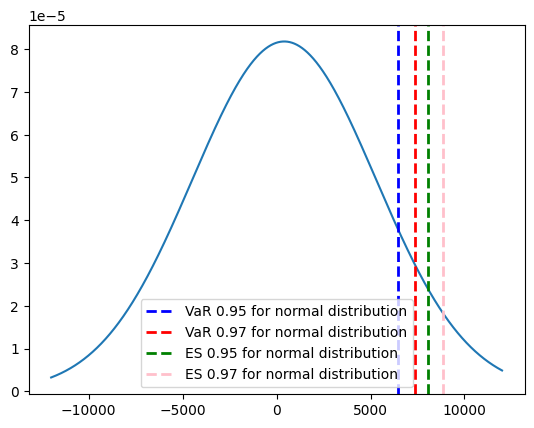

In [57]:
from scipy.stats import norm
x_axis  = np.arange(-12000,12000, 0.01)
plt.plot(x_axis, norm.pdf(x_axis, portfolio_mean,Std_deviation))
plt.axvline(x=VaR_n_1_op, color='blue', linestyle='dashed', linewidth=2, label='VaR 0.95 for normal distribution' )
plt.axvline(x=VaR_n_2_op, color='red', linestyle='dashed', linewidth=2, label='VaR 0.97 for normal distribution' )
plt.axvline(x=ES_n1_op, color='green', linestyle='dashed', linewidth=2, label='ES 0.95 for normal distribution' )
plt.axvline(x=ES_n2_op, color='pink', linestyle='dashed', linewidth=2, label='ES 0.97 for normal distribution' )
plt.legend()
plt.show()

#### For t-distribution

In [76]:
# Horizon and confidence levels
import math
from scipy.stats import t

# Input variables
mean =  portfolio_mean_op  # Portfolio mean
std_dev = Std_deviation_op # Portfolio standard deviation
conf_level_1 = 0.95   # 95% confidence level
conf_level_2 = 0.97
sample_size = 20   # Portfolio sample size

# Calculate t-statistic
df = sample_size - 1 if sample_size < 30 else math.inf
t_stat_1 = t.ppf(conf_level_1, df)
t_stat_2 = t.ppf(conf_level_2, df)

# Calculate VaR
var_t_1_op = (t_stat_1 * std_dev) + mean

var_t_2_op = (t_stat_2 * std_dev) + mean

print("95% VaR t-distribution is", round(var_t_1_op, 2))
print("97% VaR t-distribution is", round(var_t_2_op, 2))


95% VaR t-distribution is 6760.15
97% VaR t-distribution is 7802.39


In [59]:
# Horizon and confidence levels
import math
from scipy.stats import t
 
# Horizon and confidence levels
h = 120 # horizon of 120 days
alpha1 = 0.95 # 95% confidence level
alpha2 = 0.97 # 97% confidence level
portfolio_size = 20
# Calculate degrees of freedom for t-distribution
n = portfolio_size - 1

# Calculate volatility over the horizon
sig_h_t = Std_deviation_op 

# Calculate Expected Shortfall (CVaR) for 95% confidence level
ES_t_1_op = ((t.pdf(t.ppf(alpha1, n), n) / (1 - alpha1)) * sig_h_t) + portfolio_mean_op

# Calculate Expected Shortfall (CVaR) for 97% confidence level
ES_t_2_op =  ((t.pdf(t.ppf(alpha2, n), n) / (1 - alpha2)) * sig_h_t) + portfolio_mean_op 

print("95% CVaR/ES t-distribution is", round(ES_t_1_op, 2))
print("97% CVaR/ES t-distribution is", round(ES_t_2_op, 2))

95% CVaR/ES t-distribution is 7133.35
97% CVaR/ES t-distribution is 7580.41


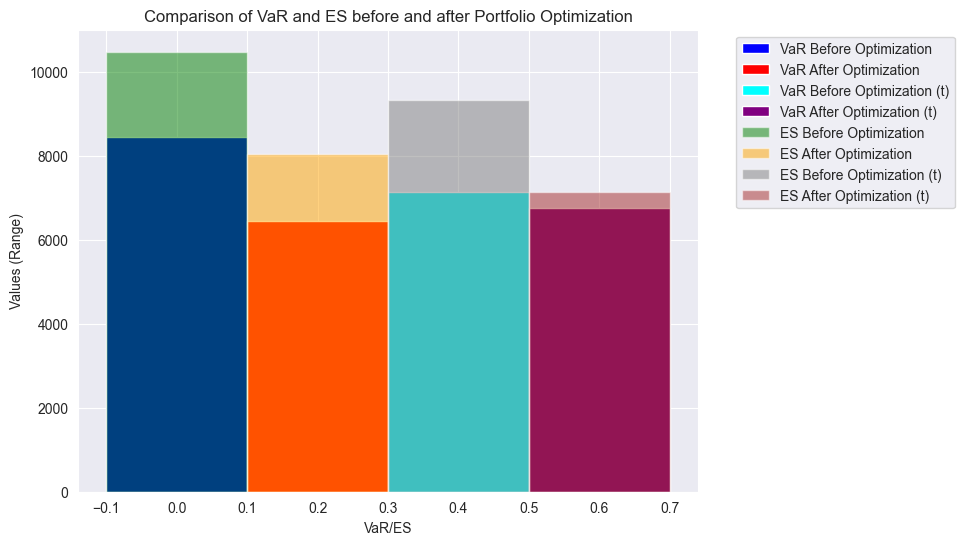

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data before optimization
VaR_n_1 = [8434.2]
ES_n_1 = [10473.61]

# Define the data after optimization
VaR_n_1_op = [6435.88]
ES_n_1_op = [8043.61]

# Define the data before optimization for t distribution
VaR_t1 = [7133.35]
ES_t1 = [9318.94]

# Define the data after optimization for t distribution
VaR_t1_op = [6760.15]
ES_t1_op = [7133.35]

# Set the width of the bars
barWidth = 0.2

# Set the x positions of the bars
r1 = np.arange(len(VaR_n_1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the VaR values
plt.bar(r1, VaR_n_1, color='blue', width=barWidth, edgecolor='white', label='VaR Before Optimization')
plt.bar(r2, VaR_n_1_op, color='red', width=barWidth, edgecolor='white', label='VaR After Optimization')
plt.bar(r3, VaR_t1, color='cyan', width=barWidth, edgecolor='white', label='VaR Before Optimization (t)')
plt.bar(r4, VaR_t1_op, color='purple', width=barWidth, edgecolor='white', label='VaR After Optimization (t)')

# Plot the ES values
plt.bar(r1, ES_n_1, color='green', width=barWidth, edgecolor='white', label='ES Before Optimization', alpha=0.5)
plt.bar(r2, ES_n_1_op, color='orange', width=barWidth, edgecolor='white', label='ES After Optimization', alpha=0.5)
plt.bar(r3, ES_t1, color='gray', width=barWidth, edgecolor='white', label='ES Before Optimization (t)', alpha=0.5)
plt.bar(r4, ES_t1_op, color='brown', width=barWidth, edgecolor='white', label='ES After Optimization (t)', alpha=0.5)

# Add labels and title
plt.xlabel('VaR/ES')
plt.ylabel('Values (Range)')
plt.title('Comparison of VaR and ES before and after Portfolio Optimization')

# Add legend outside the graph
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.show()

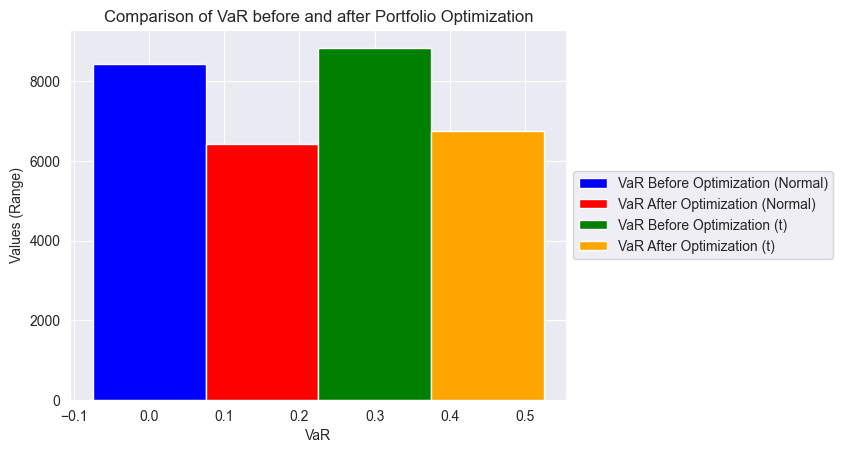

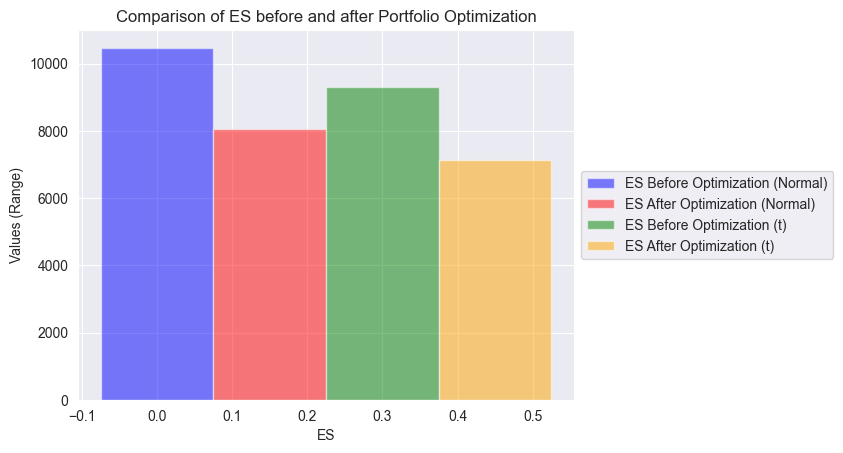

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data before optimization
VaR_n_1 = [8434.2]
ES_n_1 = [10473.61]

# Define the data after optimization
VaR_n_1_op = [6435.88]
ES_n_1_op = [8043.61]

# Define the data before optimization for t distribution
VaR_t1 = [8845.54]
ES_t1 = [9318.94]

# Define the data after optimization for t distribution
VaR_t1_op = [6760.15]
ES_t1_op = [7133.35]

# Set the width of the bars
barWidth = 0.15

# Set the x positions of the bars
r1 = np.arange(len(VaR_n_1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Plot the VaR values
plt.bar(r1, VaR_n_1, color='blue', width=barWidth, edgecolor='white', label='VaR Before Optimization (Normal)')
plt.bar(r2, VaR_n_1_op, color='red', width=barWidth, edgecolor='white', label='VaR After Optimization (Normal)')
plt.bar(r3, VaR_t1, color='green', width=barWidth, edgecolor='white', label='VaR Before Optimization (t)')
plt.bar(r4, VaR_t1_op, color='orange', width=barWidth, edgecolor='white', label='VaR After Optimization (t)')

# Add labels and title
plt.xlabel('VaR')
plt.ylabel('Values (Range)')
plt.title('Comparison of VaR before and after Portfolio Optimization')

# Add legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

# Plot the ES values
plt.bar(r1, ES_n_1, color='blue', width=barWidth, edgecolor='white', label='ES Before Optimization (Normal)', alpha=0.5)
plt.bar(r2, ES_n_1_op, color='red', width=barWidth, edgecolor='white', label='ES After Optimization (Normal)', alpha=0.5)
plt.bar(r3, ES_t1, color='green', width=barWidth, edgecolor='white', label='ES Before Optimization (t)', alpha=0.5)
plt.bar(r4, ES_t1_op, color='orange', width=barWidth, edgecolor='white', label='ES After Optimization (t)', alpha=0.5)

# Add labels and title
plt.xlabel('ES')
plt.ylabel('Values (Range)')
plt.title('Comparison of ES before and after Portfolio Optimization')

# Add legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

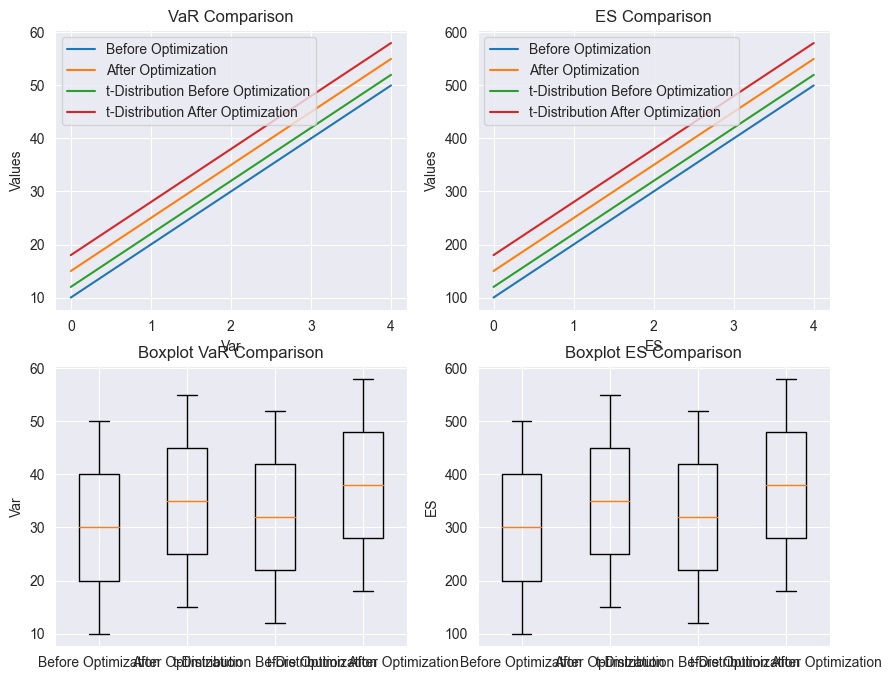

In [73]:
import matplotlib.pyplot as plt

# Define data
VaR_n_1 = [10, 20, 30, 40, 50]
ES_n_1 = [100, 200, 300, 400, 500]
VaR_n_1_op = [15, 25, 35, 45, 55]
ES_n_1_op = [150, 250, 350, 450, 550]
VaR_t_1 = [12, 22, 32, 42, 52]
ES_t_1 = [120, 220, 320, 420, 520]
VaR_t_1_op = [18, 28, 38, 48, 58]
ES_t_1_op = [180, 280, 380, 480, 580]

# Create figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create subplots
axs[0, 0].plot(VaR_n_1, label='Before Optimization')
axs[0, 0].plot(VaR_n_1_op, label='After Optimization')
axs[0, 0].plot(VaR_t_1, label='t-Distribution Before Optimization')
axs[0, 0].plot(VaR_t_1_op, label='t-Distribution After Optimization')
axs[0, 0].set_xlabel('Var')
axs[0, 0].set_ylabel('Values')
axs[0, 0].set_title('VaR Comparison')
axs[0, 0].legend()

axs[0, 1].plot(ES_n_1, label='Before Optimization')
axs[0, 1].plot(ES_n_1_op, label='After Optimization')
axs[0, 1].plot(ES_t_1, label='t-Distribution Before Optimization')
axs[0, 1].plot(ES_t_1_op, label='t-Distribution After Optimization')
axs[0, 1].set_xlabel('ES')
axs[0, 1].set_ylabel('Values')
axs[0, 1].set_title('ES Comparison')
axs[0, 1].legend()

axs[1, 0].boxplot([VaR_n_1, VaR_n_1_op, VaR_t_1, VaR_t_1_op], labels=['Before Optimization', 'After Optimization', 't-Distribution Before Optimization', 't-Distribution After Optimization'])
axs[1, 0].set_ylabel('Var')
axs[1, 0].set_title('Boxplot VaR Comparison')

axs[1, 1].boxplot([ES_n_1, ES_n_1_op, ES_t_1, ES_t_1_op], labels=['Before Optimization', 'After Optimization', 't-Distribution Before Optimization', 't-Distribution After Optimization'])
axs[1, 1].set_ylabel('ES')
axs[1, 1].set_title('Boxplot ES Comparison')

# Show plot
plt.show()
